In [1]:
env_name = "envs/GrabbingPointDetector"  # Name of the Unity environment binary to launch
train_mode = True

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mlagents.envs.environment import UnityEnvironment

In [13]:
env = UnityEnvironment(file_name=env_name)

INFO:mlagents.envs:
'RobotArmAcademy' started successfully!
Unity Academy name: RobotArmAcademy
        Reset Parameters : scale -> 1.0
		mass -> 1.0
		gravity -> 9.8100004196167


In [4]:
env.reset(train_mode=train_mode)

INFO:mlagents.envs:Connected new brain:
Unity brain name: RobotArm Behaviour
        Number of Visual Observations (per agent): 1
        Camera Resolutions: ['CameraResolution(84, 84, 3)']
        Vector Observation space size (per agent): 0
        Vector Action space type: continuous
        Vector Action space size (per agent): [1]
        Vector Action descriptions: 


{'RobotArm Behaviour': <mlagents.envs.brain.BrainInfo at 0x114ddaef0>}

In [5]:
env.agents

AttributeError: 'UnityEnvironment' object has no attribute 'agents'

In [6]:
default_brain = env.external_brain_names[0]
brain = env.brains[default_brain]

Agent state looks like: 
[]
Agent observations look like:
(1, 84, 84, 3)


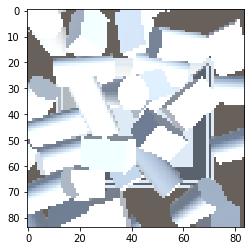

In [10]:
# Reset the environment
env_info = env.reset(train_mode=train_mode)[default_brain]
# Examine the state space for the default brain
print("Agent state looks like: \n{}".format(env_info.vector_observations[0]))

# Examine the observation space for the default brain
for observation in env_info.visual_observations:
    print("Agent observations look like:")
    observation = np.array(observation)
    if observation.shape[3] == 3:
        print(observation.shape)
        plt.imshow(observation[0,:,:,:])
    else:
        plt.imshow(observation[0,:,:,0])

In [ ]:
for episode in range(10):
    env_info = env.reset(train_mode=train_mode)[default_brain]
    done = False
    episode_rewards = 0
    while not done:
        action_size = brain.vector_action_space_size
        env_info = env.step(np.random.randn(len(env_info.agents), action_size[0]))[default_brain]

        episode_rewards += env_info.rewards[0]
        done = env_info.local_done[0]
    print("Total reward this episode: {}".format(episode_rewards))

In [15]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.